Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра». Имеются данные о поведении клиентов, которые уже перешли на эти тарифы. Необходимо построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — бвла сделана ранее. Нужно найти модель с максимально большим значением accuracy, минимальное значение - 0,75.
План работы:
1. Изучение данных.
2. Разбиение данных на выборки.
3. Исследование модели.
4. Проверка на тестовой выборке.
5. Дополнительное задание.
6. Заключение.

**1. Изучение данных**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import sklearn.metrics
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/datasets/users_behavior.csv')
display(df.head())
df.info()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Имеются данные о количестве звонков, суммарном количестве минут, потраченных абонентами, количество сообщений, использованных мегабайт данных трафика. Последний столбец - "is_ultra" - это данные о тарифе абонента. Если используется тариф "Ультра", значение равно 1, если тариф "Смарт" - 0. Всего имеется 3214 строк с данными в 5 столбцах.

**2. Разбиение данные на выборки**

Данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов сделаем одинаковыми. Разобьем исходные данные 60%-20%-20%.

In [5]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345, stratify = df['is_ultra'])
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=12345, stratify = df_valid['is_ultra'])

**3. Исследование модели**

Исследование выбора тарифа будет проходить по столбцу "is_ultra". Поэтому данный столбец будет целевым значением. Остальные столбцы будут данными для обучения. Из ранее выделенных выборок обучающей - train и валидационной - valid выделим необходимые разделы features и target, где target - целевой столбец.

In [6]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

In [7]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(1928, 4)
(1928,)
(643, 4)
(643,)


Проведем исследование модели DecisionTreeClassifier. Добавляем параметр случайности выбора данных random_state = 12345, параметр depth со значениями 1-5. Изменяя параметр depth, можно выбрать максимально высокий результат accuracy (нам нужен не менее 0,75).

In [8]:
best_result=0
depth_1 = 0
for depth in range(1, 6):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_1.fit(features_train, target_train)
    predictions_1_valid = model_1.predict(features_valid)
    result_1 = accuracy_score(target_valid, predictions_1_valid)
    if result_1 > best_result:
        best_result = result_1
        depth_1 = depth
    print("depth -", depth, 'accuracy =', result_1)
    
print('При значении depth =', depth_1, 'лучший результат', best_result)

depth - 1 accuracy = 0.7402799377916018
depth - 2 accuracy = 0.7729393468118196
depth - 3 accuracy = 0.7776049766718507
depth - 4 accuracy = 0.7542768273716952
depth - 5 accuracy = 0.7853810264385692
При значении depth = 5 лучший результат 0.7853810264385692


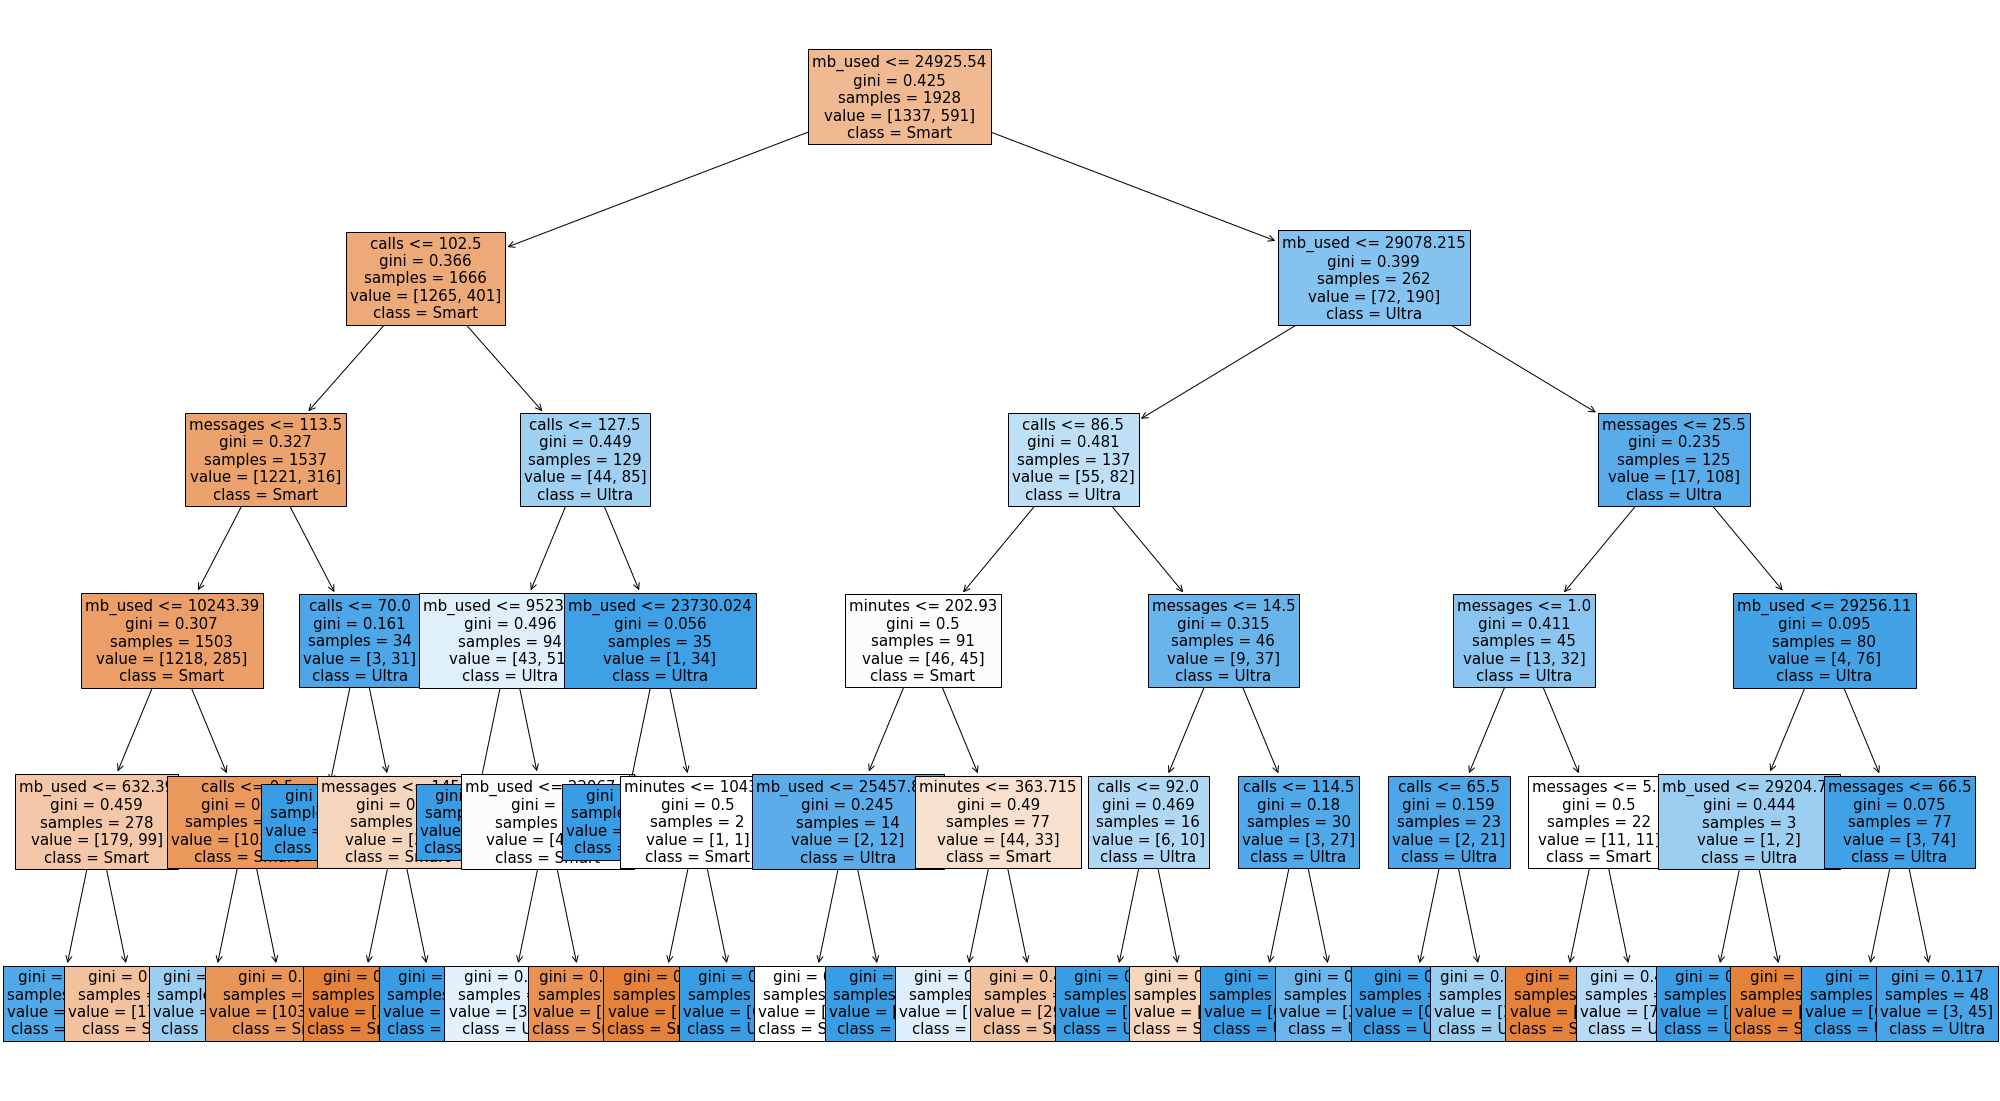

In [9]:
fig = plt.figure(figsize=(35,20))
pict = tree.plot_tree(model_1, 
               feature_names=['calls', 'minutes','messages','mb_used'], 
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 15)

Следующая модель для исследования - RandomForestClassifier. Добавляем параметр случайности выбора данных random_state = 12345, устанавливаем гиперпараметр estimators до 10 единиц. Найдем оптимальное решение для данной модели.

In [10]:
for estimators in range(1, 10):
    model_2 = RandomForestClassifier(random_state=12345, n_estimators=estimators)
    model_2.fit(features_train, target_train)
    predictions_2_valid = model_2.predict(features_valid)
    result_2 = accuracy_score(target_valid, predictions_2_valid)
    print("estimators = ", estimators, 'accuracy =', result_2)

estimators =  1 accuracy = 0.6998444790046656
estimators =  2 accuracy = 0.7433903576982893
estimators =  3 accuracy = 0.7418351477449455
estimators =  4 accuracy = 0.7558320373250389
estimators =  5 accuracy = 0.7527216174183515
estimators =  6 accuracy = 0.7729393468118196
estimators =  7 accuracy = 0.7698289269051322
estimators =  8 accuracy = 0.776049766718507
estimators =  9 accuracy = 0.7698289269051322


Для модели RandomForestClassifier получили наилучший результат accuracy - 0.776049766718507 при 8 оценщиках.

Следующая логистическая модель - LogisticRegression. Для постоянства результата добавляем параметр random_state = 12345, выбираем алгоритм lbfgs, подходящий для большинства случаев, устанавливаем количество итераций обучения - 1000

In [11]:
model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_3.fit(features_train, target_train) 
predictions_3 = model_3.predict(features_valid) 
result_3 = model_3.score(features_valid, target_valid)
print('accuracy =', result_3)

accuracy = 0.7387247278382582


Качество работы логистической регрессии = 0.7387247278382582, что ниже, чем у предыдущих моделей.

Из полученных результатов следует, что наилучшее качество у модели DecisionTreeClassifier. По ней и будем проводить проеверку на тестовой выборке

**4. Проверка на тестовой выборке**

In [12]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']
print(features_test.shape)
print(target_test.shape)

(643, 4)
(643,)


Проверяем DecisionTreeClassifier. Параметр случайности выбора данных random_state оставляем без изменений, параметр depth=5 (такой результат мы получили ранее).

In [13]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_train, target_train)
predictions_test= model.predict(features_test)
result = accuracy_score(target_test, predictions_test) 
print('accuracy =', result)

accuracy = 0.8118195956454122


In [14]:
df_train2, df_test = train_test_split(df, test_size=0.2, random_state=12345, stratify = df['is_ultra'])
features_train2 = df_train2.drop(['is_ultra'], axis=1)
target_train2 = df_train2['is_ultra']
print(features_train2.shape)
print(target_train2.shape)
model_5 = DecisionTreeClassifier(random_state=12345, max_depth=3)
model_5.fit(features_train2, target_train2)
predictions_train2= model_5.predict(features_test)
result_5 = accuracy_score(target_test, predictions_train2) 
print('accuracy =', result_5)

(2571, 4)
(2571,)
accuracy = 0.7807153965785381


**5. Дополнительное задание - проверьте модели на адекватность**

Для проверки качества модели, возьмем некую самую простую модель, сравним полученные результаты. Берем модель DummyClassifier, устанавливаем стратегию константа, т.е. всегда предсказывать метку, предоставленную пользователем. Значение метки - 0.

In [15]:
from sklearn.dummy import DummyClassifier
model_4 = DummyClassifier(strategy='constant', random_state=12345, constant=0)
model_4.fit(features_train, target_train)
predictions_4= model_4.predict(features_test)
result_4 = accuracy_score(target_test, predictions_4) 
print('accuracy =', result_4)

accuracy = 0.6936236391912908


**Заключение**

1. Изучение данных

Имеющиеся данные о пользовании сотовой связью абонентами оператора мобильной связи «Мегалайн» позволили провести машинное обучение и построить модель, способную проанализировать поведение клиентов, и предлагающую им подходящий тариф – Смарт или Ультра.

На первом этапе полученные данные были проанализированы на составляющие. Имеются данные о количестве и длительности звонков, количестве сообщений, пользовании интернетом, названии тарифного плана.

2. Деление на выборки

Данные поделили на три части: обучающую, валидационную и тестовую. Обучающая часть - самая большая выборка – составила 60% от изначально предоставленных данных. Оставшуюся часть поделили по 20% от общих данных для валидации модели и тестирования. Для сравнения были использованы три модели обучения: DecisionTreeClassifier (дерево решений), RandomForestClassifier (случайный лес), LogisticRegression (логистическая регрессия).

3. Проверка моделей

Модели позволяют менять и устанавливать разные гиперпараметры. Для модели DecisionTreeClassifier рассчитали степень accuracy при разной глубине дерева. Получили максимальный результат при глубине дерева – 3.

Для модели RandomForestClassifier пробовали менять параметр estimators – количество случайных деревьев. Максимальный результат был получен при значении параметра 8. Но все же величина accuracy оказалась меньше, чем у модели DecisionTreeClassifier. Модель LogisticRegression позволяет устанавливать различную величину итераций обучения.

Качество расчетов модели LogisticRegression ниже, чем у DecisionTreeClassifier, поэтому именно модель DecisionTreeClassifier выбрираем для проверки на тестовой выборке данных.

4. Проверка на тестовой выборке

Для тестовой выборки данных формируем целевой признак, проверяем действие обученной модели. Получили результат accuracy - 0.7791601866251944.

Данная модель обучена и позволит анализировать поведение клиентов и предлагать им подходящий тариф.

5. Дополнительное задание

Дополнительно провели сравнение работы упрощенной модели DummyClassifier с имеющимися данными. Модель, которая выдает константные значения для каждого целевого признака. Качество работы такой модели 0.6842923794712286. Данное значение accuracy наглядно показывает насколько лучше работает обученная модель, изучающая взаимосвязи предоставленных даных, а не предлагающая стнадартное решение. Этот показатель значительно ниже, чем у каждой из трех рассмотренных моделей и значительно меньше, чем заявленные требования заказчика.